In [1]:
# importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating a dictionary with configuration/setup we will be using
config = {
    "model"            : "vgg16",
    "weights"          : "imagenet",
    "features_path"    : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/features.h5",
    "labels_path"      : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/labels.h5",
    "classifier_path"  : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/classifier.pickle",
    "model_path"       : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/model",
    "test_size"        : 0.20,
    "seed"             : 9,
}

In [3]:
# config variables
test_size = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
classifier_path = config["classifier_path"]

In [4]:
# import features and labels
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
features.shape

(1840, 4096)

In [6]:
# verify the shape of features and labels
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))
print("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                 np.array(labels),
                                                                 test_size=test_size,
                                                                 random_state = seed)
print("[INFO] Train data : {}".format(trainData.shape))
print("[INFO] Test data : {}".format(testData.shape))
print("[INFO] Train labels : {}".format(trainLabels.shape))
print("[INFO] Test labels : {}".format(testLabels.shape))

[INFO] features shape: (1840, 4096)
[INFO] labels shape: (1840,)
[INFO] training started...
[INFO] Train data : (1472, 4096)
[INFO] Test data : (368, 4096)
[INFO] Train labels : (1472,)
[INFO] Test labels : (368,)


In [7]:
# use Logistic Regression as the model
print("[INFO] creating model...")
model = LogisticRegression(random_state = seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# evaluate the model of the test data
preds = model.predict(testData)

In [10]:
# dump classifer to file
print("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


In [11]:
# display the confusion matrix
print("----------------Confusion matrix---------------")

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

----------------Confusion matrix---------------


In [12]:
cm

array([[169,  17],
       [ 18, 164]], dtype=int64)

In [13]:
accuracy = (368 - (17 + 18))/368 * 100

In [14]:
accuracy

90.48913043478261

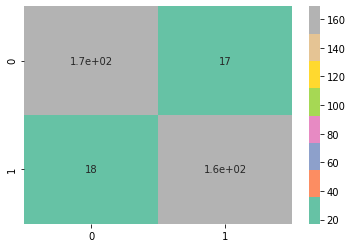

In [15]:
sns.heatmap(cm,
           annot = True,
           cmap = 'Set2')
plt.show()